In [384]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab as py
import numpy as np
from imp import reload
import pixie_read_st as pxr

In [385]:
plt.style.use('ggplot')
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['text.usetex']=True
plt.rcParams['animation.html'] = 'html5'

In [386]:
filepath = "/net/scratch3/giannis_kx/pixie3d/iter/iter3d/db_tear/dt_sh_m3_n2.scratch/"

In [225]:
pxr.pixieload(filepath + "pixie3d.h5")

timesteps= 205
Dictionary of terms:
Variables: ['Car_variables', 'Cnv_variables', 'Cov_variables', 'Diagnostics', 'Perturbations', 'cells', 'nodes']
Cartesian: ['Bx', 'By', 'Bz', 'Jx', 'Jy', 'Jz', 'T=Te+Ti', 'Ve_1', 'Ve_2', 'Ve_3', 'Vx', 'Vy', 'Vz', 'rho']
Contravariant: ['B^1', 'B^2', 'B^3', 'J*P^2', 'J.(pi+pe)', 'J.Rho', 'J^1', 'J^2', 'J^3', 'P^1', 'P^3']
Covariant: ['B_1', 'B_2', 'B_3', 'J_1', 'J_2', 'J_3', 'T=Te+Ti', 'V_1', 'V_2', 'V_3', 'rho']
Diagnostic: ['E_1', 'E_2', 'E_3', 'Int. heat src', 'Poloidal flux', 'Temperature', 'V.(b x grad(psi))', 'V.grad(psi)', 'V||', 'chi', 'eta', 'lambda', 'local div(B)', 'local div(J)', 'local div(V)', 'nu', 'q factor']
Perturbations: ['B^1 pert', 'B^2 pert', 'B^3 pert', 'P^1 pert', 'P^2 pert', 'P^3 pert', 'Rho pert', 'p=pi+pe pert']
Cell: ['X', 'Y', 'Z']
Node: ['X', 'Y', 'Z']


In [226]:
#B1 = pxr.load_array(1,0,None,5)
#B2 = pxr.load_array(1,1,None,5)
#B3 = pxr.load_array(1,2,None,5)
psi_pol = pxr.load_array(3,4,None,200)

In [8]:
psi_pol.shape

(129, 65, 33, 5)

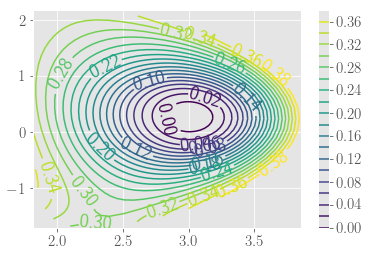

In [68]:
CS = plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],psi_pol[:,:,0,1],20)
plt.clabel(CS,fmt="%1.2f")
plt.colorbar()
plt.show()

In [43]:
B1t = np.mean(B1,axis=2)
B2t = np.mean(B2,axis=2)

In [52]:
pxr.pntCnvInGrid_shaped(2.3,-1.5)

(0.89256306588775758, 4.7222425815902218)

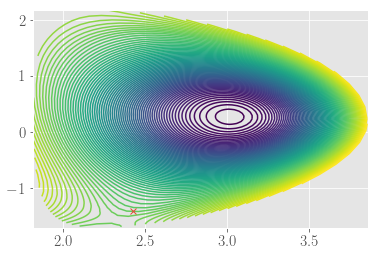

In [51]:
CS = plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],psi_pol[:,:,0,0],100)
plt.plot(pxr.X[108,48,1],pxr.Z[108,48,1],"x")
plt.show()

## Q-Profile

In [336]:
q = np.load(filepath+"q_mpi.npy")

In [339]:
time_list = [x for x in range(204)]

In [340]:
psin_list = np.linspace(0.0,1.0,101)

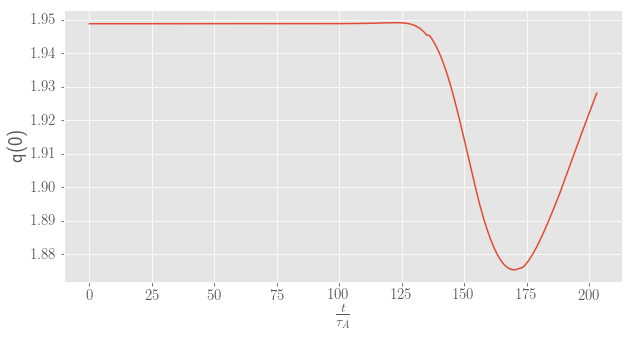

In [342]:
plt.figure(figsize=(10,5))
plt.plot(time_list[0:],q[0,0:])
plt.xlabel(r"$\frac{t}{\tau_A}$")
plt.ylabel("q(0)")
plt.show()

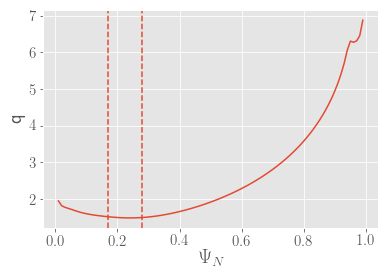

In [344]:
plt.plot(psin_list[1:-1],q[:,0])
plt.axvline(psin_list[idx32][0],linestyle='dashed')
plt.axvline(psin_list[idx32][1],linestyle='dashed')
plt.xlabel(r'$\Psi_N$')
plt.ylabel(r'q')
plt.show()

In [345]:
idx32 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(3./2.)))).flatten()
idx85 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(8./5.)))).flatten()
idx53 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(5./3.)))).flatten()
idx21 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(2./1.)))).flatten()
idx31 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(3./1.)))).flatten()

In [346]:
idx11 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(1./1.)))).flatten()
idx21 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(2./1.)))).flatten()
idx31 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(3./1.)))).flatten()
idx41 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(4./1.)))).flatten()
idx51 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(5./1.)))).flatten()

In [347]:
idx12 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(1./2.)))).flatten()
idx22 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(2./2.)))).flatten()
idx32 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(3./2.)))).flatten()
idx42 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(4./2.)))).flatten()
idx52 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(5./2.)))).flatten()

In [348]:
idx13 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(1./3.)))).flatten()
idx23 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(2./3.)))).flatten()
idx33 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(3./3.)))).flatten()
idx43 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(4./3.)))).flatten()
idx53 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(5./3.)))).flatten()

In [356]:
idx85

array([ 8, 35])

In [77]:
reload(pxr)

/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py:12: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/traitlets/config/application.py", line 658, i

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [349]:
b_hat_rho = np.load(filepath + "b_hat_rho_mpi.npy")

In [350]:
b_hat_rho.shape

(101, 65, 33, 204)

In [351]:
bnmt = pxr.nm_array(b_hat_rho)

In [81]:
from matplotlib import animation, rc
import matplotlib.animation as animation
import types
from IPython.display import HTML

In [381]:
def anim():
    fig,ax = plt.subplots(figsize=(10,10))
    ax.set_title(r'(3,2) Double Tearing')
    ax.set_xlabel(r'$\Psi_N$')
    ax.set_ylabel(r'Im($\hat{b}^{\rho}_{m/n}$)')
    ax.plot([],[],'r',label='n=1,m=1')
    ax.plot([],[],'y',label='n=1,m=2')
    ax.plot([],[],'g',label='n=1,m=3')
    ax.plot([],[],'k',label='n=2,m=3')
    ax.plot([],[],'b',label='n=3,m=5')
    ax.plot([],[],'m',label='n=5,m=8')
    #ax.plot([],[],'k',label='n=2,m=3')
    ax.axvline(psin_list[idx21][0],linestyle='dashed',color='y')
    ax.axvline(psin_list[idx32][0],linestyle='dashed',color='k')
    ax.axvline(psin_list[idx32][1],linestyle='dashed',color='k')
    ax.axvline(psin_list[idx31][0],linestyle='dashed',color='g')
    ax.axvline(psin_list[idx53][0],linestyle='dashed',color='b')
    ax.axvline(psin_list[idx53][1],linestyle='dashed',color='b')
    ax.axvline(psin_list[idx85][0],linestyle='dashed',color='m')
    ax.axvline(psin_list[idx85][1],linestyle='dashed',color='m')
    

    ax.legend()
    ims = []
    for time_stamp in range(0,204):
        im1, = ax.plot(psin_list[:],np.asarray(bnmt[:,1,1,time_stamp]).imag,'r')
        im2, = ax.plot(psin_list[:],np.asarray(bnmt[:,2,1,time_stamp]).imag,'y')
        im3, = ax.plot(psin_list[:],np.asarray(bnmt[:,3,1,time_stamp]).imag,'g')
        im4, = ax.plot(psin_list[:],np.asarray(bnmt[:,3,2,time_stamp]).imag,'k')
        im5, = ax.plot(psin_list[:],np.asarray(bnmt[:,5,3,time_stamp]).imag,'b')
        im6, = ax.plot(psin_list[:],np.asarray(bnmt[:,8,5,time_stamp]).imag,'m')
        #im7, = ax.plot(psin_list[:],np.asarray(bnmt[:,-3,2,time_stamp]).imag,'k')
        text = 't = '+str(time_stamp)

        an = ax.annotate(text, xy=(0.8, 0.94), xycoords='axes fraction',fontsize=14)
        ims.append([im1]+[im2]+[im3]+[im4]+[im5]+[im6]+[an])

    art_ani = animation.ArtistAnimation(fig, ims, interval=200, repeat_delay=100,blit=False)
    return art_ani

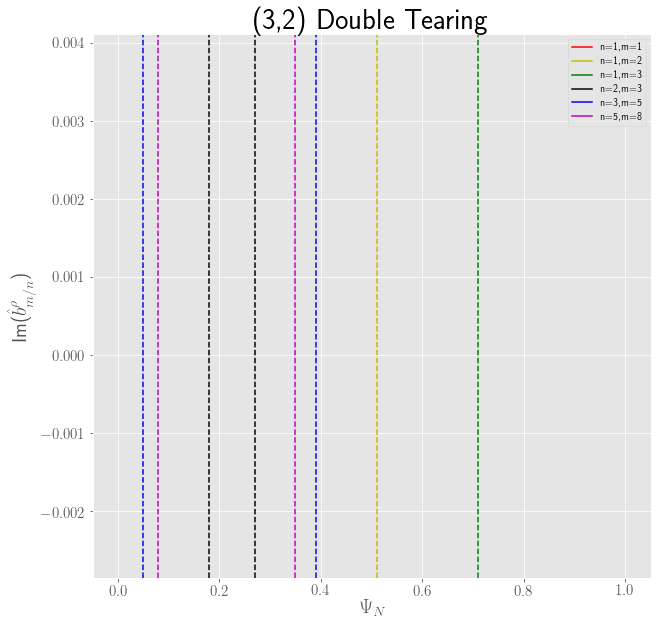

In [382]:
ani = anim()

In [383]:
ani

In [210]:
HTML(ani.to_html5_video())

In [228]:
psit = np.mean(psi_pol,axis=2)

In [230]:
for t in range(psit.shape[2]):
    print(t,np.unravel_index(np.argmin(psi_pol[:,:,0,t]),(psit.shape[0],psit.shape[1])))

0 (22, 1)
1 (22, 1)
2 (22, 1)
3 (22, 1)
4 (22, 1)
5 (22, 1)
6 (22, 1)
7 (22, 1)
8 (22, 1)
9 (22, 1)
10 (22, 1)
11 (22, 1)
12 (22, 1)
13 (22, 1)
14 (22, 1)
15 (22, 1)
16 (22, 1)
17 (22, 1)
18 (22, 1)
19 (22, 1)
20 (22, 1)
21 (22, 1)
22 (22, 1)
23 (22, 1)
24 (22, 1)
25 (22, 1)
26 (22, 1)
27 (22, 1)
28 (22, 1)
29 (22, 1)
30 (22, 1)
31 (22, 1)
32 (22, 1)
33 (22, 1)
34 (22, 1)
35 (22, 1)
36 (22, 1)
37 (22, 1)
38 (22, 1)
39 (22, 1)
40 (22, 1)
41 (22, 1)
42 (22, 1)
43 (22, 1)
44 (22, 1)
45 (22, 1)
46 (22, 1)
47 (22, 1)
48 (22, 1)
49 (22, 1)
50 (22, 1)
51 (22, 1)
52 (22, 1)
53 (22, 1)
54 (22, 1)
55 (22, 1)
56 (22, 1)
57 (22, 1)
58 (22, 1)
59 (22, 1)
60 (22, 1)
61 (22, 1)
62 (22, 1)
63 (22, 1)
64 (22, 1)
65 (22, 1)
66 (22, 1)
67 (22, 1)
68 (22, 1)
69 (22, 1)
70 (22, 1)
71 (22, 1)
72 (22, 1)
73 (22, 1)
74 (22, 1)
75 (22, 1)
76 (22, 1)
77 (22, 1)
78 (22, 1)
79 (22, 1)
80 (22, 1)
81 (22, 1)
82 (22, 1)
83 (22, 1)
84 (22, 1)
85 (22, 1)
86 (22, 1)
87 (22, 1)
88 (22, 1)
89 (22, 1)
90 (22, 1)
91 (22, 1

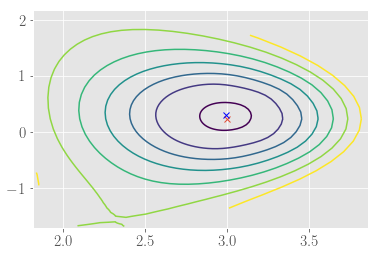

In [236]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],psi_pol[:,:,0,186])
plt.plot(pxr.X[20,0,0],pxr.Z[20,0,0],"x")
plt.plot(pxr.X[20,2,0],pxr.Z[20,2,0],"bx")
plt.show()